# Big Data (UNT) -  2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 19 de septiembre a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- en el canal de Slack #TP-entregas
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [2]:
# Importamos el paquete requests
import requests

#definimos una variable que contiene lo que queremos buscar
buscar="despertador digital" 

#usamos la API de ML siguiendo un formato general para obtener los ítems de una consulta de búsqueda
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20")) 

#definimos la variable response que usa el paquete requests para traer la información de la url
response = requests.request("GET", url) 
print(response) #verificar el pedido

#obtenemos la información en formato texto
response.text 

<Response [200]>


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"despertador digital","paging":{"total":721,"primary_results":721,"offset":0,"limit":50},"results":[{"id":"MLA1376282653","title":"Reloj Despertador Digital Cristal Liquido Alarma Temperatura Color Negro","condition":"new","thumbnail_id":"964428-MLU72628337582_112023","catalog_product_id":"MLA24304916","listing_type_id":"gold_special","sanitized_title":"reloj-despertador-digital-cristal-liquido-alarma-temperatura-color-negro","permalink":"https://www.mercadolibre.com.ar/reloj-despertador-digital-cristal-liquido-alarma-temperatura-color-negro/p/MLA24304916#wid=MLA1376282653&sid=unknown","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA3949","domain_id":"MLA-TABLE_AND_ALARM_CLOCKS","thumbnail":"http://http2.mlstatic.com/D_964428-MLU72628337582_112023-I.jpg","currency_id":"ARS","order_backend":1,"price":10199,"original_price":24500,"sale_price":{"price_id":"","amount":10199,"conditions":{"eligible":true,"context

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [4]:
# Primero guardamos los resultados en formato diccionario
data = response.json()
data

{'site_id': 'MLA',
 'country_default_time_zone': 'GMT-03:00',
 'query': 'despertador digital',
 'paging': {'total': 721, 'primary_results': 721, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLA1376282653',
   'title': 'Reloj Despertador Digital Cristal Liquido Alarma Temperatura Color Negro',
   'condition': 'new',
   'thumbnail_id': '964428-MLU72628337582_112023',
   'catalog_product_id': 'MLA24304916',
   'listing_type_id': 'gold_special',
   'sanitized_title': 'reloj-despertador-digital-cristal-liquido-alarma-temperatura-color-negro',
   'permalink': 'https://www.mercadolibre.com.ar/reloj-despertador-digital-cristal-liquido-alarma-temperatura-color-negro/p/MLA24304916#wid=MLA1376282653&sid=unknown',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA3949',
   'domain_id': 'MLA-TABLE_AND_ALARM_CLOCKS',
   'thumbnail': 'http://http2.mlstatic.com/D_964428-MLU72628337582_112023-I.jpg',
   'currency_id': 'ARS',
   'order_backend': 1,
   'price': 10199,
   'orig

In [6]:
# Construcción del data frame

import pandas as pd #importamos el paquete de pandas 

items = data['results']
precios = [item['price'] for item in items]
 
precios_df= pd.DataFrame(precios, columns=['Precio']) #creamos un DataFrame con los precios
#print(precios_df)

#calculo del precio promedio, mínimo y máximo
print('El precio promedio es', precios_df['Precio'].mean())
print('El precio mínimo es', precios_df['Precio'].min())
print('El precio máximo es', precios_df['Precio'].max())

El precio promedio es 20446.9088
El precio mínimo es 5199.0
El precio máximo es 110000.0


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

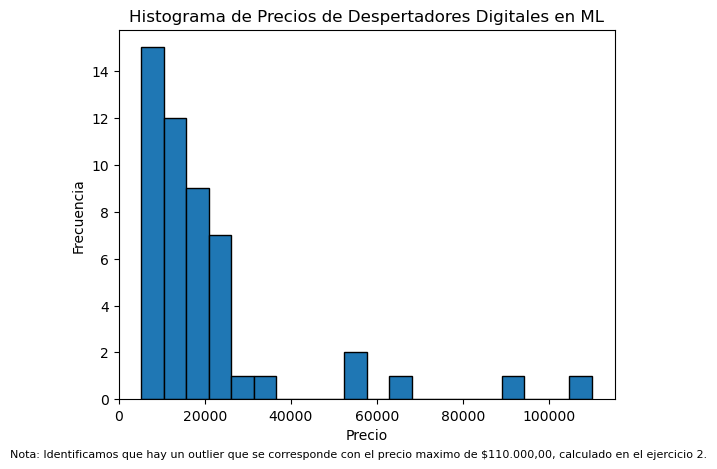

In [58]:
## Creamos el histograma con Matplotlib

#Instalamos e importamos la librería gráfica Matplotlib
#!pip install matplotlib  
import matplotlib.pyplot as plt 

precios_df['Precio'].plot.hist(bins=20, edgecolor='black', title='Histograma de Precios de Despertadores Digitales en ML')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.figtext(0.5, -0.01, "Nota: Identificamos que hay un outlier que se corresponde con el precio maximo de $110.000,00, calculado en el ejercicio 2.", weight="light", ha="center", fontsize=8)
plt.show()

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [62]:
## Vamos a listar los items por vendedor usando la API de ML

# Primero obtenemos el seller id de un vendedor de alguno de los items que cargamos en el ejercicio 1, usaremos el item n° 15

print(items[15]['seller']['id']) #porque definimos previamente items como items= data['results'] (ejercicio 2), de lo contrario el comando completo sería
#print(data['results'][15]['seller']['id'])

# Al usar la API tenemos que seguir este formato: https://api.mercadolibre.com/sites/$SITE_ID/search?seller_id=$SELLER_ID
url = "https://api.mercadolibre.com/sites/{}/search?seller_id={}".format("MLA", '511551686') #definimos la url a la que pediremos la información

response2 = requests.get(url)
response2.text

511551686


'{"site_id":"MLA","seller":{"id":511551686,"nickname":"TECNODALASCOMAR"},"country_default_time_zone":"GMT-03:00","paging":{"total":710,"primary_results":710,"offset":0,"limit":50},"results":[{"id":"MLA1903991514","title":"Camara Seguridad Seisa Ip Wifi Exterior C/audio Full Hd Domo Color Blanco Ipc Zas04","condition":"new","thumbnail_id":"804580-MLA53545874758_012023","catalog_product_id":"MLA21889707","listing_type_id":"gold_special","sanitized_title":"camara-seguridad-seisa-ip-wifi-exterior-caudio-full-hd-domo-color-blanco-ipc-zas04","permalink":"https://www.mercadolibre.com.ar/camara-seguridad-seisa-ip-wifi-exterior-caudio-full-hd-domo-color-blanco-ipc-zas04/p/MLA21889707#wid=MLA1903991514&sid=unknown","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA5959","domain_id":"MLA-SURVEILLANCE_CAMERAS","thumbnail":"http://http2.mlstatic.com/D_804580-MLA53545874758_012023-I.jpg","currency_id":"ARS","order_backend":1,"price":49999,"original_price":null,"sale_price":{"price_id":"",

In [66]:
# Ordenamos la información en formato diccionario
data2=response2.json()
data2

{'site_id': 'MLA',
 'seller': {'id': 511551686, 'nickname': 'TECNODALASCOMAR'},
 'country_default_time_zone': 'GMT-03:00',
 'paging': {'total': 710, 'primary_results': 710, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLA1903991514',
   'title': 'Camara Seguridad Seisa Ip Wifi Exterior C/audio Full Hd Domo Color Blanco Ipc Zas04',
   'condition': 'new',
   'thumbnail_id': '804580-MLA53545874758_012023',
   'catalog_product_id': 'MLA21889707',
   'listing_type_id': 'gold_special',
   'sanitized_title': 'camara-seguridad-seisa-ip-wifi-exterior-caudio-full-hd-domo-color-blanco-ipc-zas04',
   'permalink': 'https://www.mercadolibre.com.ar/camara-seguridad-seisa-ip-wifi-exterior-caudio-full-hd-domo-color-blanco-ipc-zas04/p/MLA21889707#wid=MLA1903991514&sid=unknown',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA5959',
   'domain_id': 'MLA-SURVEILLANCE_CAMERAS',
   'thumbnail': 'http://http2.mlstatic.com/D_804580-MLA53545874758_012023-I.jpg',
   'currency_id': 

In [70]:
## Cosas que podríamos analizar

# Queremos saber primero cuantos productos tiene publicados este vendedor 
print('Productos publicados:', len(data2['results'])) #nos sale 50 porque está limitado

# Queremos saber cuántos de sus productos son nuevos.
nuevos=0

for item in data2['results']:
    if item['condition'] == 'new':
        nuevos +=1

print('Productos que son nuevos:', nuevos) #todos los productos publicados son nuevos

# Queremos saber cuántos tienen envío gratis
envio=0

for item in data2['results']:
    if item['shipping']['free_shipping'] == True:
        envio +=1

print('Productos que tienen envío gratis:', envio) #ningún producto tiene envío gratis

Productos publicados: 50
Productos que son nuevos: 50
Productos que tienen envío gratis: 6


In [78]:
# Diferencia de precio entre el original y el nuevo, podemos hacer un ratio y calcular un promedio para saber en cuanto aumento los precios el vendedor
# Además nos gustaría saber en cuanto aumento los precios en promedio este vendedor entre el precio original de cada publicación y el precio nuevo

pratio=[]
for item in data2['results']:
    if item['original_price'] is not None: # verifico que 'original_price' no sea None, es decir, que no este vacío
        ratio= item['price']/item['original_price'] #calculo el ratio
        pratio.append(ratio) #agrego el ratio a la lista

print(pratio) #visualizamos la lista, podemos apreciar que el vendedor siempre que cambió un precio en una publicación fue para bajarlo

import statistics as st #importamos el paquete statistics para calcular el promedio de los ratios

print('El vendedor cambió en promedio sus precios en un', round((st.mean(pratio)-1)*100,2), '%')

[0.9, 0.7499989896744732, 0.85]
El vendedor cambió en promedio sus precios en un -16.67 %


### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [82]:
## Importamos las librerías

import requests #html requestor
from bs4 import BeautifulSoup #html parser
import pandas as pd #dataframe manipulator

## Consultamos la información de la url de La Nación

url = "https://www.lanacion.com.ar/"

r = requests.get(url) #traigo el contenido del html
contenido = r.content

soup = BeautifulSoup(contenido, "html.parser")
soup

<!DOCTYPE html>
<html lang="es"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1.0,minimum-scale=0.5,maximum-scale=5.0,user-scalable=yes" name="viewport"/><meta content="#ffffff" name="theme-color"/><title>Últimas noticias de Argentina y el mundo - LA NACION</title><link as="image" fetchpriority="high" href="https://www.lanacion.com.ar/resizer/v2/el-papa-francisco-y-juan-grabois-en-VHTL6TC2WFBBXL6HM5J5MQIGTA.JPG?auth=1a94c6149573673c352c8b72fd42533d70de164082e9d943f54f4f8668f0f080&amp;width=488&amp;height=325&amp;quality=70&amp;smart=true" media="(min-width: 768px)" rel="preload"/><link as="image" fetchpriority="high" href="https://www.lanacion.com.ar/resizer/v2/el-papa-francisco-y-juan-grabois-en-VHTL6TC2WFBBXL6HM5J5MQIGTA.JPG?auth=1a94c6149573673c352c8b72fd42533d70de164082e9d943f54f4f8668f0f080&amp;width=420&amp;height=280&amp;quality=70&amp;smart=true" media="(max-width: 767px)" rel="preload"/><style id="critical-fonts">
@font-face {font-family:'Prumo';

In [96]:
## Extraemos todos los links de las noticias

links = []
for link in soup.find_all('section', href=True):
    href = url + link['href']
    if href not in links:  # Evitamos duplicados
        links.append(href)
      
print(links)

['https://www.lanacion.com.ar//politica/francisco-critico-al-gobierno-y-repudio-el-protocolo-antipiquetes-en-vez-de-pagar-justicia-social-nid20092024/', 'https://www.lanacion.com.ar//politica/demoliciones-bullrich-la-nueva-arma-de-milei-nid19092024/', 'https://www.lanacion.com.ar//deportes/automovilismo/franco-colapinto-en-la-f1-en-vivo-nid20092024/', 'https://www.lanacion.com.ar//economia/tercerizar-privatizar-dividir-o-liquidar-activos-que-se-puede-hacer-y-que-no-con-aerolineas-nid19092024/', 'https://www.lanacion.com.ar//espectaculos/personajes/murio-el-actor-daniel-fanego-nid19092024/', 'https://www.lanacion.com.ar//economia/dolar/dolar-hoy-dolar-blue-hoy-a-cuanto-cotiza-este-viernes-20-de-septiembre-nid20092024/', 'https://www.lanacion.com.ar//economia/campo/alimentos-quien-es-la-argentina-que-llego-a-la-cima-de-un-curioso-consejo-mundial-creado-para-el-nid20092024/', 'https://www.lanacion.com.ar//el-mundo/hezbollah-lanza-un-bombardeo-masivo-contra-israel-tras-el-ataque-con-beeper

In [102]:
## Guardamos los links en un DataFrame
df_links = pd.DataFrame(links, columns=["Links"])
df_links

#Exportamos el dataframe como archivo excel
df_links.to_csv('links_noticias.csv', index=False)

Adjuntamos capturas de pantalla de la página inicial de La Nación, tanto del inicio como del final de la página.
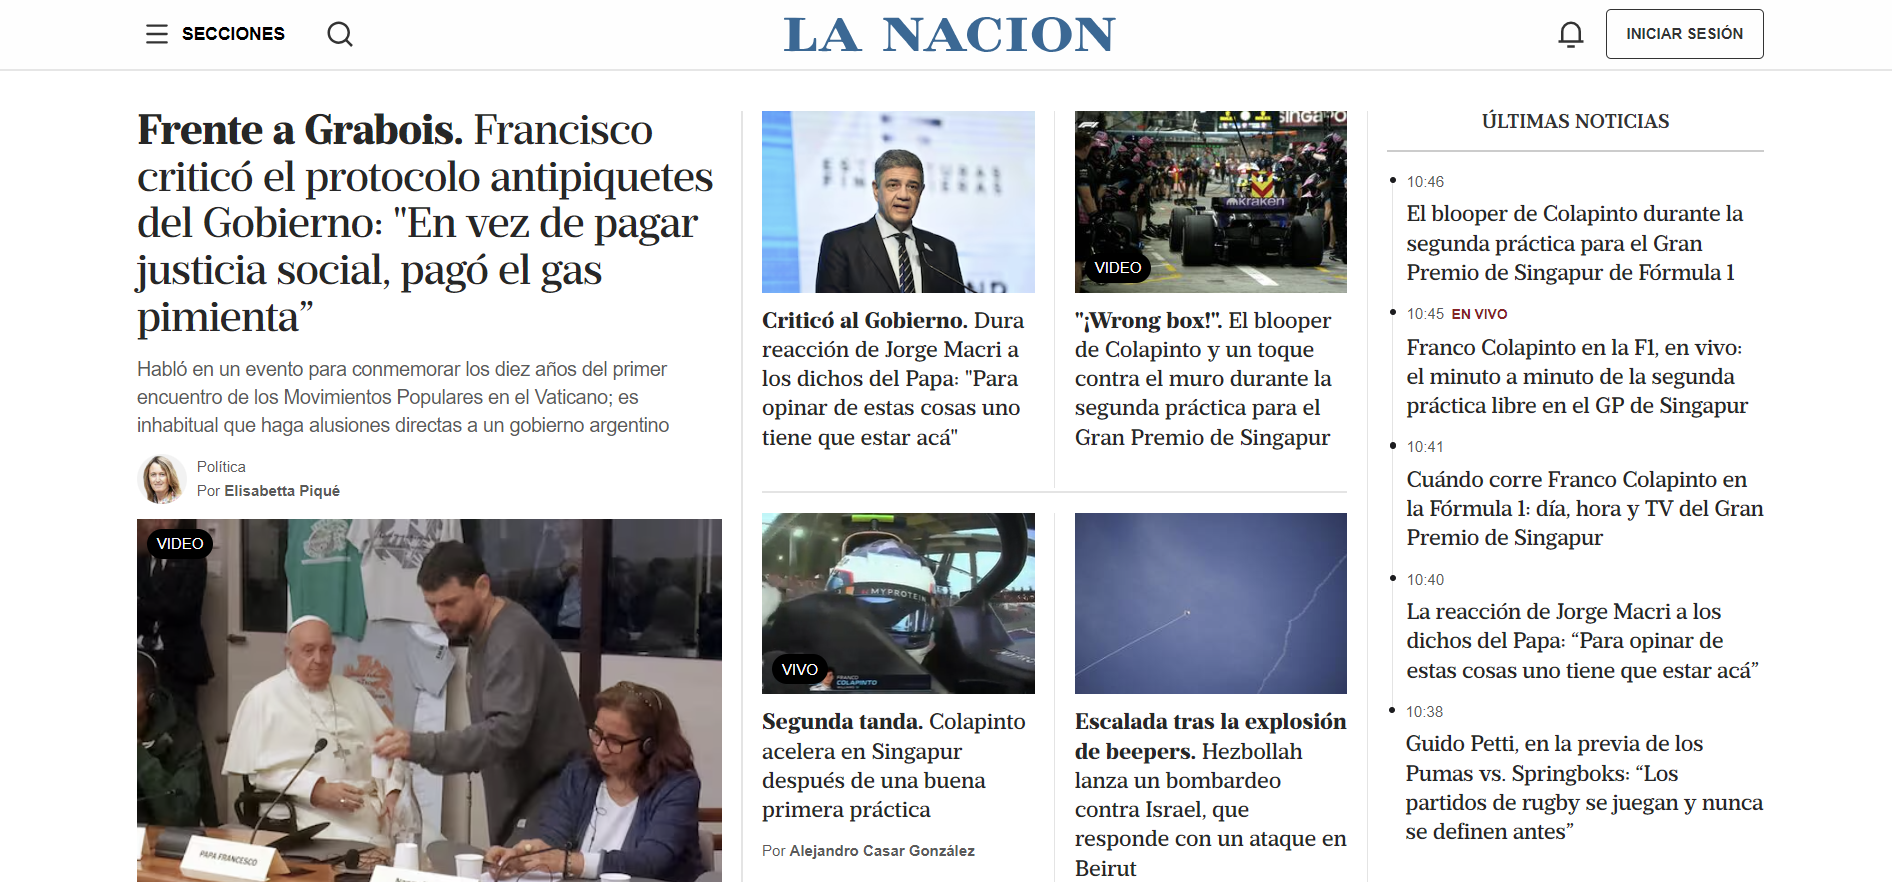
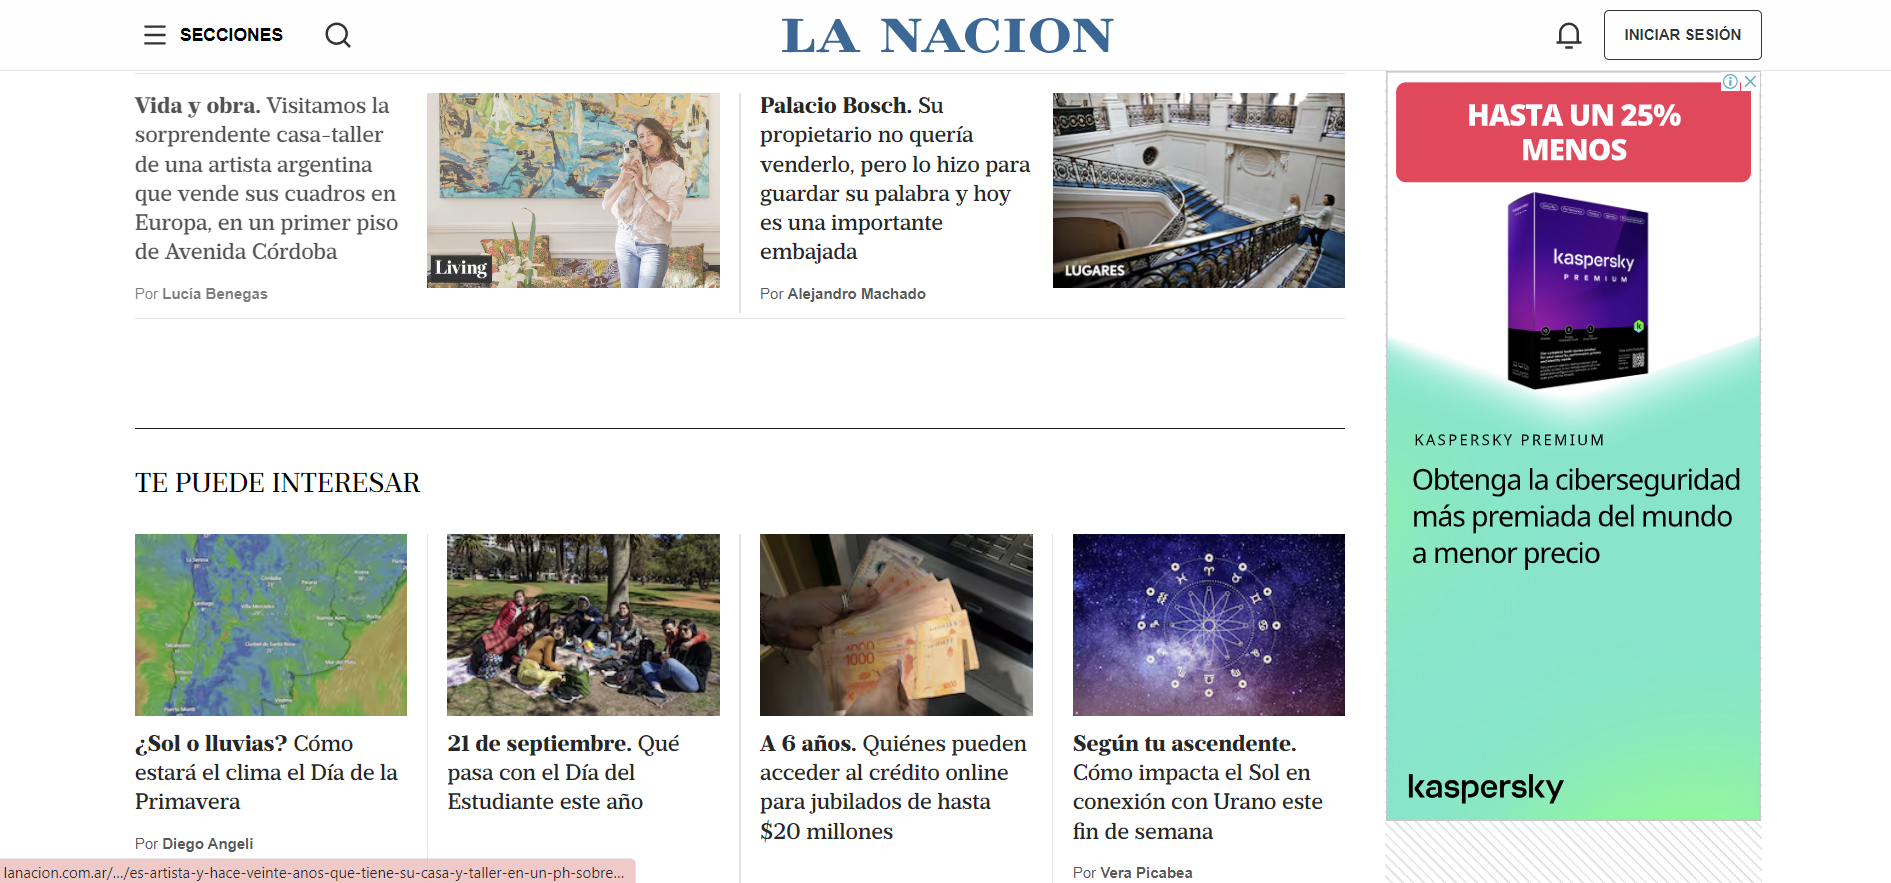